## Cash Flow Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Load Data

In [2]:
data = pd.read_csv('simulated_cashflow_data.csv')
print(f"Loaded {len(data)} months of data")
data.head()

Loaded 120 months of data


,Month,Year,Revenue,Recession,AR_Delay,Other_Expenses,COGS,OPEX_Variable,OPEX_Fixed,Total_Expenses,Cash_Collected,Net_Cash_Flow,Cash_Start,Cash_End,Shortage_Alert
0,1,1,53619.941307,0,0,2520,26809.970654,5361.994131,15000,49691.964784,53619.941307,3928.0,100000.0,103928.0,0
1,2,1,54507.143064,0,2,1969,27253.571532,5450.714306,15000,49673.285838,0.000000,-49673.0,103928.0,54255.0,0
2,3,1,47087.945476,0,3,2198,23543.972738,4708.794548,15000,45450.767286,0.000000,-45451.0,54255.0,8804.0,1
3,4,1,48437.255600,0,0,1438,24218.627800,4843.725560,15000,45500.353360,48437.255600,2937.0,8804.0,11741.0,0
4,5,1,55872.223685,0,2,1634,27936.111843,5587.222369,15000,50157.334211,47087.945476,-3069.0,11741.0,8672.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           120 non-null    int64  
 1   Year            120 non-null    int64  
 2   Revenue         120 non-null    float64
 3   Recession       120 non-null    int64  
 4   AR_Delay        120 non-null    int64  
 5   Other_Expenses  120 non-null    int64  
 6   COGS            120 non-null    float64
 7   OPEX_Variable   120 non-null    float64
 8   OPEX_Fixed      120 non-null    int64  
 9   Total_Expenses  120 non-null    float64
 10  Cash_Collected  120 non-null    float64
 11  Net_Cash_Flow   120 non-null    float64
 12  Cash_Start      120 non-null    float64
 13  Cash_End        120 non-null    float64
 14  Shortage_Alert  120 non-null    int64  
dtypes: float64(8), int64(7)
memory usage: 14.2 KB


## Basic Statistics

Quick look at the numbers.

In [4]:
data[['Revenue', 'Total_Expenses', 'Net_Cash_Flow', 'Cash_End']].describe()

,Revenue,Total_Expenses,Net_Cash_Flow,Cash_End
count,120.000000,120.000000,120.000000,120.000000
mean,49343.606900,46078.197473,2413.900000,192023.850000
std,7317.896436,4421.389140,9538.874529,105091.004478
min,31106.944377,34226.166626,-49673.000000,8672.000000
25%,44378.688401,43460.415024,-771.250000,102502.500000
50%,48699.284578,46112.205129,3029.500000,213235.000000
75%,54509.549755,49278.429380,7658.750000,270774.250000
max,65587.584397,56909.550638,19856.000000,391256.000000


## Key Metrics

Looking at overall cash health.

In [5]:
print("Cash Flow Summary")
print("-" * 40)
print(f"Starting cash: ${data['Cash_Start'].iloc[0]:,.0f}")
print(f"Ending cash: ${data['Cash_End'].iloc[-1]:,.0f}")
print(f"Change: ${data['Cash_End'].iloc[-1] - data['Cash_Start'].iloc[0]:,.0f}")
print()
print(f"Lowest cash: ${data['Cash_End'].min():,.0f}")
print(f"Highest cash: ${data['Cash_End'].max():,.0f}")
print()
print(f"Months with negative cash flow: {(data['Net_Cash_Flow'] < 0).sum()}/{len(data)}")
print(f"Shortage alerts: {data['Shortage_Alert'].sum()} months")

Cash Flow Summary
----------------------------------------
Starting cash: $100,000
Ending cash: $389,668
Change: $289,668

Lowest cash: $8,672
Highest cash: $391,256

Months with negative cash flow: 40/120
Shortage alerts: 2 months


## Cash Position Over Time

The main chart - shows cash balance month by month.

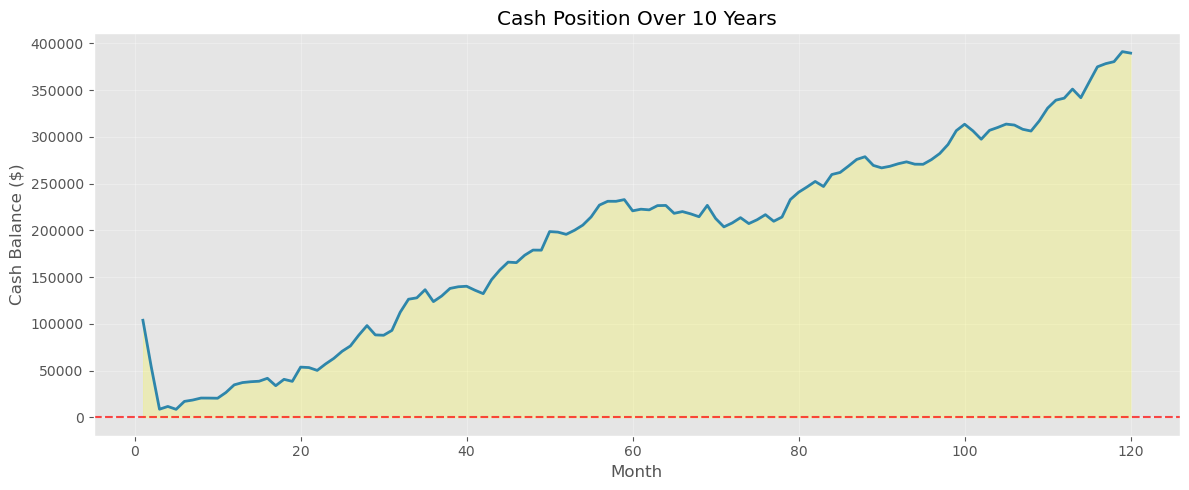

In [6]:
plt.figure(figsize=(12, 5))
plt.plot(data['Month'], data['Cash_End'], linewidth=2, color='#2E86AB')
plt.axhline(0, color='red', linestyle='--', alpha=0.7)
plt.fill_between(data['Month'], 0, data['Cash_End'], 
                 where=(data['Cash_End'] > 0), alpha=0.2, color='yellow')
plt.fill_between(data['Month'], 0, data['Cash_End'], 
                 where=(data['Cash_End'] < 0), alpha=0.2, color='red')
plt.xlabel('Month')
plt.ylabel('Cash Balance ($)')
plt.title('Cash Position Over 10 Years')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Monthly Cash Flow

Green bars = cash coming in, Red bars = cash going out.

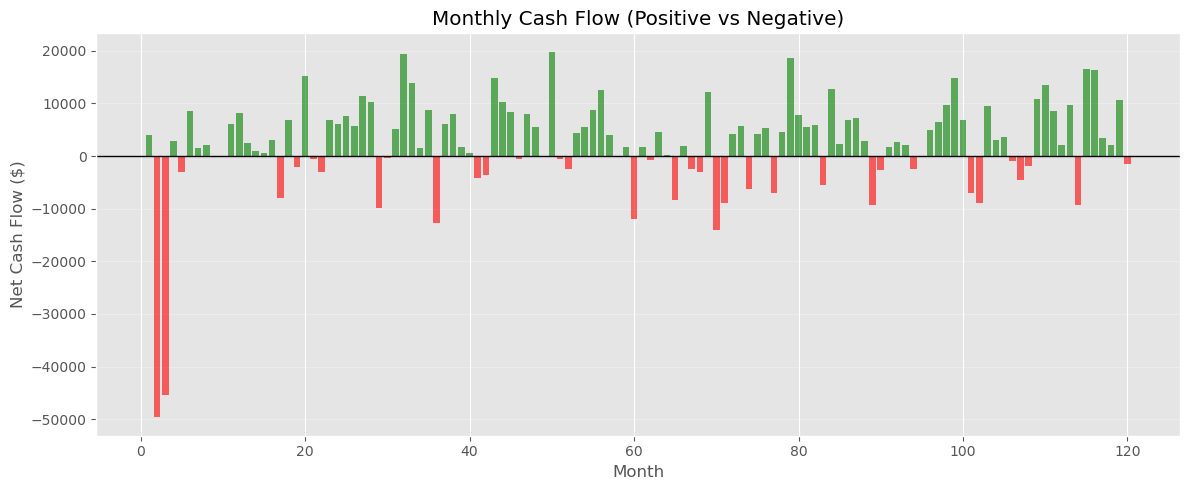

In [7]:
plt.figure(figsize=(12, 5))
colors = ['green' if x > 0 else 'red' for x in data['Net_Cash_Flow']]
plt.bar(data['Month'], data['Net_Cash_Flow'], color=colors, alpha=0.6)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Month')
plt.ylabel('Net Cash Flow ($)')
plt.title('Monthly Cash Flow (Positive vs Negative)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Revenue vs Expenses

The gap between these lines determines cash flow.

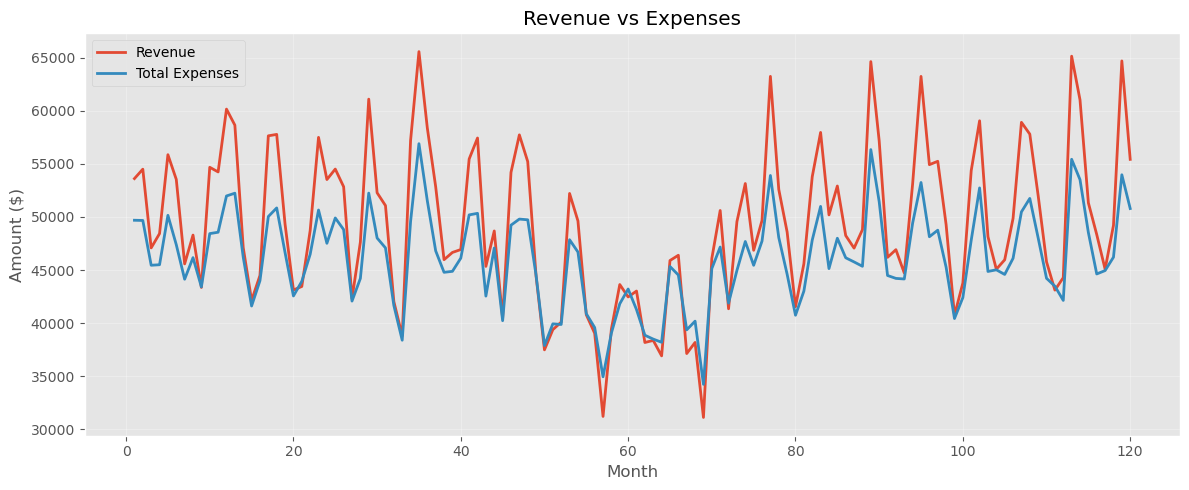

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(data['Month'], data['Revenue'], label='Revenue', linewidth=2)
plt.plot(data['Month'], data['Total_Expenses'], label='Total Expenses', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Revenue vs Expenses')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Year-by-Year Breakdown

Average cash position for each year.

In [9]:
yearly = data.groupby('Year').agg({
    'Revenue': 'mean',
    'Total_Expenses': 'mean',
    'Net_Cash_Flow': 'mean',
    'Cash_End': 'mean'
}).round(0)

print(yearly)

      Revenue  Total_Expenses  Net_Cash_Flow  Cash_End
Year                                                  
1     51617.0         47546.0        -5429.0   28885.0
2     50291.0         46897.0         2359.0   45592.0
3     51983.0         47536.0         5059.0  102496.0
4     50581.0         46813.0         4593.0  150460.0
5     41648.0         41353.0         3498.0  211284.0
6     41102.0         41219.0        -1079.0  218362.0
7     51066.0         46676.0         4317.0  229411.0
8     52336.0         48063.0         1328.0  271061.0
9     50689.0         46685.0         2547.0  304732.0
10    52124.0         47994.0         6946.0  357955.0


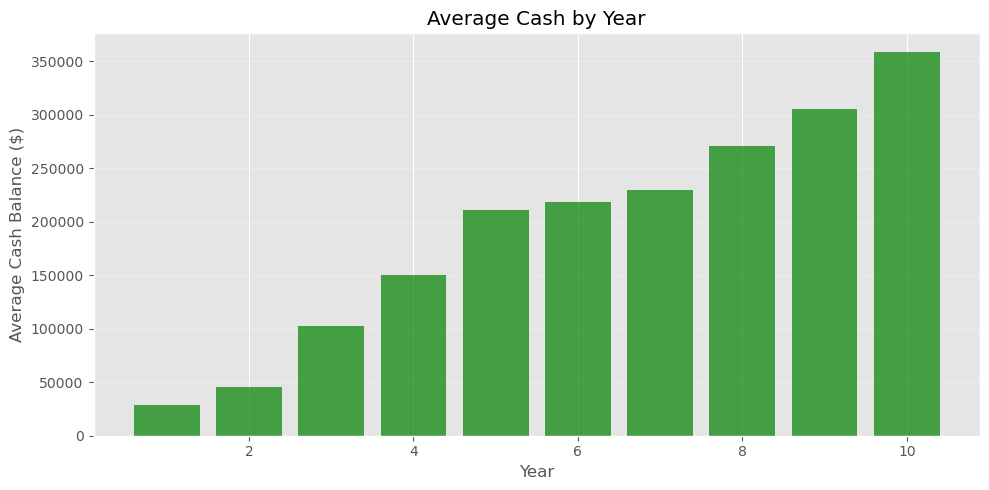

In [10]:
plt.figure(figsize=(10, 5))
plt.bar(yearly.index, yearly['Cash_End'], color='green', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Average Cash Balance ($)')
plt.title('Average Cash by Year')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Recession Impact

Years 5-6 had a recession (20% revenue drop). Let's see the effect.

In [11]:
normal = data[data['Recession'] == 0]
recession = data[data['Recession'] == 1]

print("Normal Periods:")
print(f"  Average revenue: ${normal['Revenue'].mean():,.0f}")
print(f"  Average cash flow: ${normal['Net_Cash_Flow'].mean():,.0f}")
print()
print("Recession Periods (Years 5-6):")
print(f"  Average revenue: ${recession['Revenue'].mean():,.0f}")
print(f"  Average cash flow: ${recession['Net_Cash_Flow'].mean():,.0f}")
print()
print(f"Revenue drop: {((recession['Revenue'].mean() - normal['Revenue'].mean()) / normal['Revenue'].mean() * 100):.1f}%")

Normal Periods:
  Average revenue: $51,336
  Average cash flow: $2,715

Recession Periods (Years 5-6):
  Average revenue: $41,375
  Average cash flow: $1,210

Revenue drop: -19.4%


## Payment Delays (AR_Delay)

How often do customers delay payment?

In [12]:
ar_counts = data['AR_Delay'].value_counts().sort_index()
print("Payment Delay Distribution:")
print(ar_counts)
print()
print(f"On-time payments (0 delay): {(data['AR_Delay'] == 0).sum()} months")
print(f"Delayed payments: {(data['AR_Delay'] > 0).sum()} months")

Payment Delay Distribution:
AR_Delay
0    31
1    24
2    48
3    17
Name: count, dtype: int64

On-time payments (0 delay): 31 months
Delayed payments: 89 months


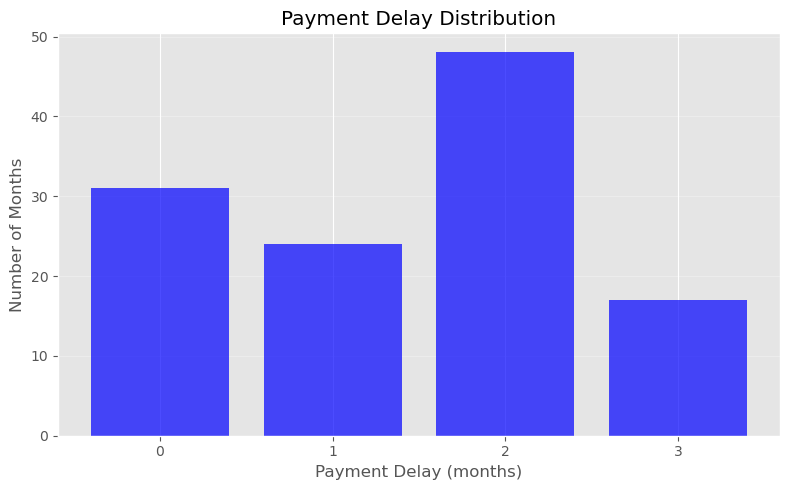

In [13]:
plt.figure(figsize=(8, 5))
plt.bar(ar_counts.index, ar_counts.values, color='blue', alpha=0.7)
plt.xlabel('Payment Delay (months)')
plt.ylabel('Number of Months')
plt.title('Payment Delay Distribution')
plt.xticks([0, 1, 2, 3])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Cash Shortage Months

When did cash drop below the danger zone (10% of starting capital)?

In [14]:
shortage_months = data[data['Shortage_Alert'] == 1]
print(f"Total shortage months: {len(shortage_months)}")
if len(shortage_months) > 0:
    print("\nMonths with cash shortage:")
    print(shortage_months[['Month', 'Year', 'Cash_End']].to_string(index=False))
else:
    print("No shortage months - cash stayed healthy!")

Total shortage months: 2

Months with cash shortage:
 Month  Year  Cash_End
     3     1    8804.0
     5     1    8672.0


## Cost Breakdown

Where does the money go?

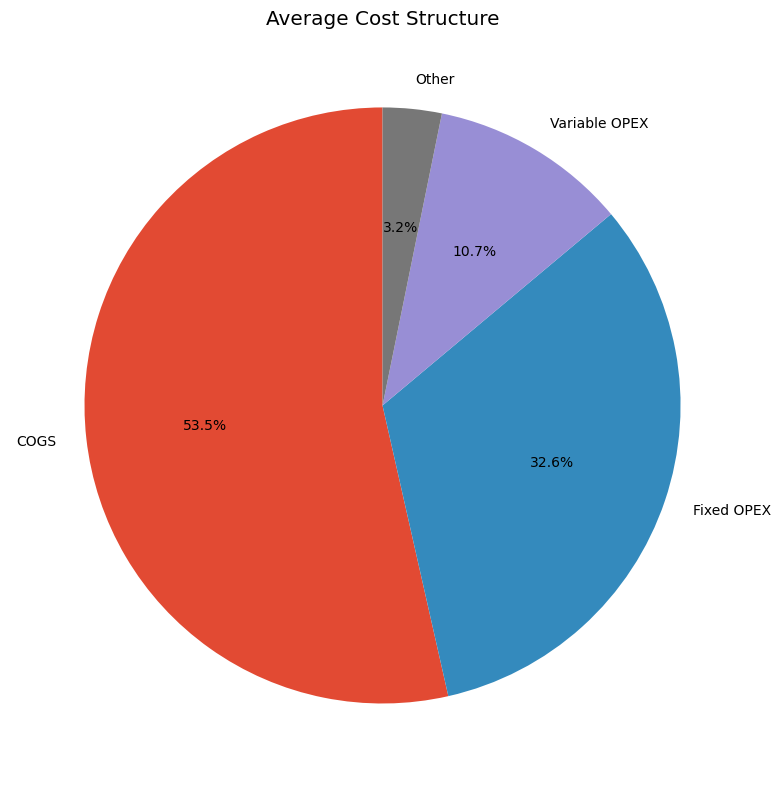

In [15]:
avg_cogs = data['COGS'].mean()
avg_opex_fixed = data['OPEX_Fixed'].mean()
avg_opex_var = data['OPEX_Variable'].mean()
avg_other = data['Other_Expenses'].mean()

costs = [avg_cogs, avg_opex_fixed, avg_opex_var, avg_other]
labels = ['COGS', 'Fixed OPEX', 'Variable OPEX', 'Other']

plt.figure(figsize=(8, 8))
plt.pie(costs, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Average Cost Structure')
plt.tight_layout()
plt.show()

## Summary

**Key findings:**
- The company survived 10 years with ups and downs
- Recession in years 5-6 hit revenue hard
- Payment delays create cash flow problems
- COGS is the biggest expense (about 50% of revenue)

**Next step:**
- Build forecasting models to predict future cash